In [1]:
# # general imports 
import os
from pathlib import Path
import numpy as np
import pandas as pd 

# nwb specific imports 
import pynwb
from nwbwidgets import nwb2widget
from hdmf_zarr import NWBZarrIO 

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
metadata = pd.read_csv('/data/metadata/bci_metadata.csv') # V1DD 
metadata.head()

,project_name,session_type,_id,name,subject_id,genotype,virus,date_of_birth,sex,modality,session_date,age,session_time,targeted_structure,ophys_fov,session_number
0,Brain Computer Interface,BCI single neuron stim,03f1b82e-4494-46bc-a959-50c4b14d13da,single-plane-ophys_731015_2025-01-28_17-40-57_...,731015,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,2024-03-14,Female,Planar optical physiology,2025-01-28,320,17:40:57.996000,Primary Motor Cortex,FOV_04,22.0
1,Brain Computer Interface,BCI single neuron stim,b28d6321-1b1b-4110-87fb-0e19325c1dfe,single-plane-ophys_767715_2025-02-17_17-41-50_...,767715,Slc17a6-IRES-Cre/wt;Ai230(TIT2L-XCaMPG-WPRE-IC...,pAAV-hSyn1-RiboL1-GCaMP8s-WPRE,2024-09-15,Female,Planar optical physiology,2025-02-17,155,17:41:50.758000,Primary Motor Cortex,FOV_03,8.0
2,Brain Computer Interface,BCI single neuron stim,580448b2-4b93-4477-b6ac-6e2972792fe0,single-plane-ophys_772414_2025-01-27_15-57-05_...,772414,Camk2a-tTA/wt;tetO-GCaMP6s/wt,pAAV-CaMKIIa-ChRmine-oScarlet-Kv2.1-WPRE - 7413,2024-10-15,Female,Planar optical physiology,2025-01-27,104,14:23:26.693000,Primary Motor Cortex,FOV_01,5.0
3,Brain Computer Interface,BCI single neuron stim,c1be8449-7bef-4967-88f5-6a6ffc29e5a3,single-plane-ophys_772414_2025-02-06_16-47-44_...,772414,Camk2a-tTA/wt;tetO-GCaMP6s/wt,pAAV-CaMKIIa-ChRmine-oScarlet-Kv2.1-WPRE - 7413,2024-10-15,Female,Planar optical physiology,2025-02-06,114,16:47:44.152999,Primary Motor Cortex,FOV_02,13.0
4,Brain Computer Interface,BCI single neuron stim,15b395c0-1caf-4be4-a212-a13b9a4d1dfc,single-plane-ophys_772414_2025-02-10_11-15-26_...,772414,Camk2a-tTA/wt;tetO-GCaMP6s/wt,pAAV-CaMKIIa-ChRmine-oScarlet-Kv2.1-WPRE - 7413,2024-10-15,Female,Planar optical physiology,2025-02-10,118,11:15:26.609999,Primary Motor Cortex,FOV_03,14.0


In [4]:
name = metadata['name'][1]
print(name)
data_path = os.path.join('/data', 'brain-computer-interface', name)
print(data_path)
nwb_file = [file for file in os.listdir(data_path) if 'nwb' in file][0]
nwb_path = os.path.join(data_path, nwb_file)
print(nwb_path)

single-plane-ophys_767715_2025-02-17_17-41-50_processed_2025-08-05_01-05-20
/data/brain-computer-interface/single-plane-ophys_767715_2025-02-17_17-41-50_processed_2025-08-05_01-05-20
/data/brain-computer-interface/single-plane-ophys_767715_2025-02-17_17-41-50_processed_2025-08-05_01-05-20/single-plane-ophys_767715_2025-02-17_17-41-50_behavior_nwb


In [5]:
io = NWBZarrIO(nwb_path, mode = 'r') 
nwb = io.read()

/opt/conda/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.7.0 because version 2.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


In [6]:
nwb2widget(nwb) 

In [7]:
photostim = nwb.stimulus["PhotostimTrials"].to_dataframe()
photostim.head()


,start_time,stop_time,start_frame,stop_frame,tiff_file,stimulus_name,laser_x,laser_y,power,duration,stimulus_function,group_index,closest_roi
id,,,,,,,,,,,,,
0,0.000000,0.618231,0,36,spont_slm_00001.tif,photostim,471.492308,136.076923,2,0.062,scanimage.mroi.stimulusfunctions.logspiral,50,27
1,0.635404,1.236461,37,72,spont_slm_00002.tif,photostim,164.883721,67.255814,2,0.062,scanimage.mroi.stimulusfunctions.logspiral,49,284
2,1.253634,1.906211,73,111,spont_slm_00003.tif,photostim,107.300813,137.186992,2,0.062,scanimage.mroi.stimulusfunctions.logspiral,9,48
3,1.923384,2.541615,112,148,spont_slm_00004.tif,photostim,419.000000,179.023256,2,0.062,scanimage.mroi.stimulusfunctions.logspiral,38,130
4,2.558788,3.211364,149,187,spont_slm_00005.tif,photostim,273.279070,182.906977,2,0.062,scanimage.mroi.stimulusfunctions.logspiral,89,549


In [8]:
bci = nwb.stimulus["Trials"].to_dataframe()
bci.head()

,start_time,stop_time,go_cue,hit,lick_L,reward_time,threshold_crossing_times,zaber_step_times,tiff_file,start_frame,stop_frame,conditioned_neuron_x,conditioned_neuron_y,closest_roi
id,,,,,,,,,,,,,,
0,1543.507213,1550.346700,0.2359,True,"[2.833, 2.9498, 3.0668, 3.2045000000000003, 3....",2.8330,2.5581,"[0.6824, 0.9014, 0.9794, 1.0654, 1.1624, 1.513...",neuron11_00001.tif,89819,90217,107.300813,137.186992,48
1,1550.363885,1556.464432,0.2359,True,"[1.7657, 1.8811, 2.0187, 2.3154, 2.4605, 2.603...",1.7657,1.6325,"[0.2867, 0.7857000000000001, 0.9947, 1.2067, 1...",neuron11_00002.tif,90218,90573,107.300813,137.186992,48
2,1556.481617,1562.169733,0.2359,True,"[1.6955, 1.8126, 1.9405, 2.087, 2.2143, 2.3784...",1.6955,1.5805,"[0.2868, 1.1157, 1.1707, 1.2157, 1.26070000000...",neuron11_00003.tif,90574,90905,107.300813,137.186992,48
3,1562.186917,1569.765344,0.2359,True,"[3.4626, 3.5763000000000003, 3.7053, 3.8376, 4...",3.5763,3.4660,"[0.5185000000000001, 1.8074, 2.2444, 3.0563, 3...",neuron11_00004.tif,90906,91347,107.300813,137.186992,48
4,1569.782528,1577.171924,0.2359,True,"[3.0641000000000003, 3.1988000000000003, 3.370...",3.1988,3.0702,"[0.2864, 1.1183, 1.2733, 2.3622, 2.6252, 2.705...",neuron11_00005.tif,91348,91778,107.300813,137.186992,48


In [21]:
epochs = nwb.epochs.to_dataframe()
epochs

,stimulus_name,start_frame,stop_frame,start_time,stop_time
id,,,,,
0,photostim,0,76291,0.000000,1310.150831
1,spont,76292,89818,1310.168004,1542.450975
2,BCI,89819,146222,1542.468148,2511.080925
3,spont_post,146223,159933,2511.098098,2746.540914
4,photostim_post,159934,238555,2746.558087,4096.722176


In [9]:
lick_times = []
go_cues = []
rewards = []
threshold_crossing_times = []
zaber_step_times = []
for index, row in bci.iterrows():
    lick_times.append(row.lick_L[np.isfinite(row.lick_L)] + row.start_time)
    zaber_step_times.append(row.zaber_step_times[np.isfinite(row.zaber_step_times)] + row.start_time)
    go_cues.append(row.go_cue + row.start_time)
    rewards.append(row.reward_time + row.start_time)
    threshold_crossing_times.append(row.threshold_crossing_times + row.start_time)
lick_times = np.hstack(lick_times)
zaber_step_times = np.hstack(zaber_step_times)

In [36]:
zaber_step_times


array([1544.18961325, 1544.40861325, 1544.48661325, ..., 2506.60996479,
       2506.78496479, 2506.91286479], shape=(1255,))

(2050.0, 2250.0)

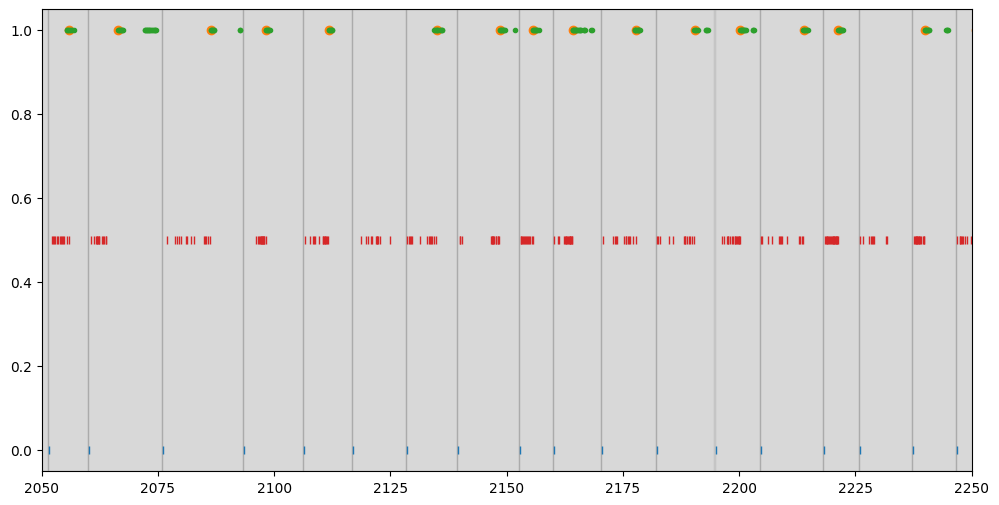

In [10]:
plt.figure(figsize=(12,6))
plt.plot(go_cues, np.zeros_like(go_cues), '|')
plt.plot(rewards, np.ones_like(rewards), 'o',)
plt.plot(lick_times, np.ones_like(lick_times), '.')

plt.plot(zaber_step_times, np.zeros_like(zaber_step_times)+0.5, '|')
plt.axvline

for index,row in bci.iterrows():
    plt.axvspan(row.start_time, row.stop_time, color='gray', alpha=0.3)
    
# plt.xlim(1540, 1600)
plt.xlim(2050,2250)

In [13]:
df = pd.DataFrame(columns=('event_times','hed_tag','hedid'))

In [19]:
df['event_times'] = go_cues
df['hed_tag'] = 'Property/Task-property/Task-event-role/Cue'
df['hedid'] = 'HED_0013104'



In [23]:
#Adds epoch start/ends. Doesn't yet label which block is which.
for index,row in epochs.iterrows():
    df.loc[len(df)] = (row.start_time, ["Event/Experiment-structure", "Property/Organizational-property/Time-block", "Property/Data-property/Data-marker/Temporal-marker/Onset"],
              ["HED_0012007","HED_0012823","HED_0012526"])
    df.loc[len(df)] = (row.stop_time, ["Event/Experiment-structure", "Property/Organizational-property/Time-block", "Property/Data-property/Data-marker/Temporal-marker/Offset"],
              ["HED_0012007","HED_0012823","HED_0012525"])
    

In [15]:
df

,event_times,hed_tag,hedid
0,1543.743113,Property/Task-property/Task-event-role/Cue,HED_0013104
1,1550.599785,Property/Task-property/Task-event-role/Cue,HED_0013104
2,1556.717517,Property/Task-property/Task-event-role/Cue,HED_0013104
3,1562.422817,Property/Task-property/Task-event-role/Cue,HED_0013104
4,1570.018428,Property/Task-property/Task-event-role/Cue,HED_0013104
...,...,...,...
85,2442.293589,Property/Task-property/Task-event-role/Cue,HED_0013104
86,2458.412782,Property/Task-property/Task-event-role/Cue,HED_0013104
87,2471.438739,Property/Task-property/Task-event-role/Cue,HED_0013104
88,2488.279686,Property/Task-property/Task-event-role/Cue,HED_0013104


In [24]:
df

,event_times,hed_tag,hedid
0,1543.743113,Property/Task-property/Task-event-role/Cue,HED_0013104
1,1550.599785,Property/Task-property/Task-event-role/Cue,HED_0013104
2,1556.717517,Property/Task-property/Task-event-role/Cue,HED_0013104
3,1562.422817,Property/Task-property/Task-event-role/Cue,HED_0013104
4,1570.018428,Property/Task-property/Task-event-role/Cue,HED_0013104
...,...,...,...
95,2511.080925,"[Event/Experiment-structure, Property/Organiza...","[HED_0012007, HED_0012823, HED_0012525]"
96,2511.098098,"[Event/Experiment-structure, Property/Organiza...","[HED_0012007, HED_0012823, HED_0012526]"
97,2746.540914,"[Event/Experiment-structure, Property/Organiza...","[HED_0012007, HED_0012823, HED_0012525]"
98,2746.558087,"[Event/Experiment-structure, Property/Organiza...","[HED_0012007, HED_0012823, HED_0012526]"
